# Myocardial Infraction Complications Analysis

## 0. Introduction

In [50]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [51]:
data = pd.read_csv("MI.data", header=None)
data.columns = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_NA", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
data.replace("?", np.NaN, inplace=True)
data = data.apply(pd.to_numeric, errors = "coerce")
# add one column at the end of the table representing the sum of all columns from FIBR_PREDS to LET_IS
data["SUM"] = data.iloc[:, 112:123].any(axis=1).astype(int)
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,SUM
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,1,0,1,0,0,0,0,3,1
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,1,0,6,1
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,0,0,0,0,1,1


In [52]:
related_time_features = ["R_AB_1_n","R_AB_2_n", "R_AB_3_n", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n","NOT_NA_2_n", "NOT_NA_3_n"]

## 1. Train-Validation-Test Split

In [53]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:112]
X = X.drop(related_time_features, axis=1)
y = [data["ZSN"], data["FIBR_PREDS"], data["P_IM_STEN"], data["REC_IM"], data["OTEK_LANC"], data["SUM"]]
y_names = ["ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC", "SUM"]
X_train, X_test, y_train, y_test = [], [], [], []

# ! Caution
# i = 0 => ZSN or Chronic heart failure
# i = 1 => FIBR_PREDS or Atrial fibrillation
# i = 2 => P_IM_STEN or Post-infarction angina
# i = 3 => REC_IM or Relapse of the myocardial infarction
# i = 4 => OTEK_LANC or Pulmonary edema
# i = 5 => SUM of all complications

for i in range(len(y)):
    # Separate train/test split for each target variable
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y[i], train_size=0.7, random_state=0, stratify=y[i])

    X_train.append(X_train_i)
    X_test.append(X_test_i)
    y_train.append(y_train_i)
    y_test.append(y_test_i)


In [54]:
# Check the number of samples in each set and print as a table
results = {"Set": ["Train", "Test"]}
for i in range(len(y)):
    results[f"{y_names[i]}"] = [len(y_train[i]), len(y_test[i])]
results = pd.DataFrame(results)
results

,Set,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC,SUM
0,Train,1190,1190,1190,1190,1190,1190
1,Test,510,510,510,510,510,510


## 2. EDA

### Data Overview

In [55]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,SUM
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,1,0,1,0,0,0,0,3,1
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,1,0,6,1
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,0,0,0,0,1,1


### Target Balance Check

In [56]:
# The number of instances in the dataset
number_of_instances = len(data)
# Create a table to show the balance of each target variable
results = {"Target": [], "0": [], "1": []}
for i in range(len(y)):
    results["Target"].append(f"{y_names[i]}")
    results["0"].append(y[i].value_counts()[0] / number_of_instances)
    results["1"].append(y[i].value_counts()[1] / number_of_instances)
results = pd.DataFrame(results)
results

,Target,0,1
0,ZSN,0.768235,0.231765
1,FIBR_PREDS,0.900000,0.100000
2,P_IM_STEN,0.912941,0.087059
3,REC_IM,0.906471,0.093529
4,OTEK_LANC,0.906471,0.093529
5,SUM,0.450000,0.550000


### Check for missing values

In [57]:
# Create a table representing number of missing values of each feature, sort them descendingly
missing_values = X.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values, columns=["Number of Missing Values"])
missing_values

,Number of Missing Values
KFK_BLOOD,1696
IBS_NASL,1628
S_AD_KBRIG,1076
D_AD_KBRIG,1076
NOT_NA_KB,686
...,...
zab_leg_02,7
zab_leg_03,7
zab_leg_04,7
INF_ANAM,4


### Data Information of Feature

In [58]:
X.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1014.000000,1023.000000,1691.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.691321,0.387097,0.115316,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.462176,0.487324,0.319498,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"]
binary_categorical_features = [x for x in X.columns if x not in continuous_features]

In [60]:
binary_features = []
for col in binary_categorical_features:
    if  X[col].max() == 1:
        binary_features.append(col)

In [61]:
categorical_features = [x for x in binary_categorical_features if x not in binary_features]

## 3. Preprocessing

In [62]:
unprocessed_data = X_train
%store unprocessed_data
unprocessed_data[0]

Stored 'unprocessed_data' (list)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1458,66.0,1,0.0,6.0,2.0,2.0,NaN,2.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
497,56.0,1,1.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
793,64.0,1,0.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
595,70.0,1,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1004,64.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,74.0,0,0.0,NaN,2.0,1.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1311,63.0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
317,63.0,1,0.0,6.0,2.0,1.0,NaN,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
24,67.0,1,1.0,6.0,2.0,1.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

columns_to_keep = []

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.columns_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.columns_to_drop = X.columns[X.isnull().sum() > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        columns_to_keep.append(list(X.columns[~X.columns.isin(self.columns_to_drop)]))
        return X.drop(columns=self.columns_to_drop)

class RowDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.rows_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        self.rows_to_drop = X.index[X.isnull().sum(axis=1) > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        return X.drop(index=self.rows_to_drop)


In [64]:
# Define outliers handler class
class OutliersHandler(BaseEstimator, TransformerMixin):
    def __init__(self, coefficient):
        self.coefficient = coefficient
        self.lower_bounds = None
        self.upper_bounds = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bounds = q1 - iqr * self.coefficient
        self.upper_bounds = q3 + iqr * self.coefficient
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        for feature in X.columns:
            if feature in continuous_features: # if feature is continuous, because clipping in the other one will probably result in missing information
                X[feature] = X[feature].clip(self.lower_bounds[feature], self.upper_bounds[feature])
        return X

In [65]:
def impute_by_type(X, continuous_features=None, categorical_features=None, binary_features=None):
    """Fills missing values based on data type, handling potential errors, works with subsets"""
    if categorical_features is not None:
        for feature in categorical_features:
            if feature in X.columns:
                try:
                    X[feature].fillna(X[feature].mode()[0], inplace=True)
                except KeyError:
                    pass
    if continuous_features is not None:
        for feature in continuous_features:
            if feature in X.columns:
                try:
                    X[feature].fillna(X[feature].mean(), inplace=True)
                except KeyError:
                    pass
    if binary_features is not None:
        for feature in binary_features:
            if feature in X.columns:
                try:
                    X[feature].fillna(X[feature].mode()[0], inplace=True)
                except KeyError:
                    pass
    return X

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Define dropper pipeline
dropper = Pipeline(steps=[
    ('column_dropper', ColumnDropper(threshold=100)),
    ('row_dropper', RowDropper(threshold=100))
])

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('dropper', dropper),
    ('outliers_clipper',OutliersHandler(coefficient=1.5)),
    ('imputation', FunctionTransformer(impute_by_type, kw_args={"continuous_features":continuous_features, "binary_features": binary_features, "categorical_features": categorical_features })),  # Fill missing values using mean/mode
    ('scaling', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Apply the preprocessing pipeline to each set
for i in range(len(y)):
    X_train[i] = preprocessing_pipeline.fit_transform(X_train[i])
    X_test[i] = preprocessing_pipeline.transform(X_test[i])

DT_preprocessed_data = pd.DataFrame(data=X_train[0], columns=columns_to_keep[0])
%store DT_preprocessed_data
DT_preprocessed_data

Stored 'DT_preprocessed_data' (DataFrame)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,...,L_BLOOD,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,0.340030,0.785397,-0.661077,1.595975,0.743926,1.015624,0.564308,-0.193621,-0.278129,-0.171499,...,1.270216,0.537529,2.653402,-0.637667,-0.373961,0.700877,0.618154,-1.684847,-0.137243,2.005267
1,-0.566563,0.785397,0.560478,-0.888818,-1.203867,-1.491829,0.564308,-0.193621,-0.278129,-0.171499,...,-1.371753,1.253432,-0.376875,-0.637667,-0.373961,-1.426785,0.618154,0.593526,-0.137243,-0.498687
2,0.158711,0.785397,-0.661077,-0.888818,0.743926,-0.238103,0.564308,-0.193621,-0.278129,-0.171499,...,1.036118,-0.178374,-0.376875,-0.637667,-0.373961,-1.426785,0.618154,0.593526,-0.137243,2.005267
3,0.702667,0.785397,-0.661077,1.595975,0.743926,-0.238103,-1.278015,-0.193621,-0.278129,-0.171499,...,-0.335031,1.611383,-0.376875,-0.637667,-0.373961,0.700877,0.618154,-1.684847,-0.137243,2.005267
4,0.158711,-1.273242,-0.661077,-0.888818,-1.203867,1.015624,0.564308,-0.193621,1.261282,-0.171499,...,-0.535687,1.253432,-0.376875,-0.637667,-0.373961,-1.426785,0.618154,-1.684847,-0.137243,-0.498687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1.065304,-1.273242,-0.661077,-0.888818,0.743926,-0.238103,-1.278015,-0.193621,-0.278129,-0.171499,...,2.340381,-0.536326,-0.376875,-0.637667,-0.373961,-1.426785,-1.617721,-1.684847,-0.137243,2.005267
1186,0.068052,0.785397,-0.661077,-0.888818,-1.203867,-1.491829,-1.278015,-0.193621,-0.278129,-0.171499,...,-0.335031,1.253432,-0.376875,-0.637667,-0.373961,-1.426785,0.618154,0.593526,-0.137243,-0.498687
1187,0.068052,0.785397,-0.661077,1.595975,0.743926,-0.238103,-1.278015,-0.193621,1.261282,-0.171499,...,0.868904,-0.894277,-0.376875,-0.637667,-0.373961,-1.426785,0.618154,0.593526,-0.137243,2.005267
1188,0.430689,0.785397,0.560478,1.595975,0.743926,-0.238103,-1.278015,-0.193621,1.261282,-0.171499,...,0.501035,-0.894277,-0.376875,-0.637667,-0.373961,0.700877,-1.617721,0.593526,-0.137243,-0.498687


## 4. Hyperparameter Tuning

In [67]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [68]:
def learning_curve_graph(models, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for i in range(len(models)):
        # Learning curve graph
        train_sizes, train_scores, test_scores = learning_curve(models[i], X_train[i], y_train[i], cv=cv, n_jobs=-1, scoring='roc_auc')
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.plot(train_sizes, train_scores_mean, label='Training Score')
        plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.ylabel('ROC_AUC Score')
        plt.xlabel('Training Set Size')
        plt.title(f'Learning Curve - Target {y_names[i]}')
        plt.legend()
        plt.grid(True)
        plt.show()

### Regular Decision Tree

#### Grid search

In [69]:
%%script false --no-raise-error # Remove if you want to run grid search
# Define pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=0))
])

# Post pruning
# best_alphas = []
# for i in range(len(y)):
#     path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train[0], y_train[0])
#     ccp_alphas, impurities = path.ccp_alphas, path.impurities
#     best_alphas.append(ccp_alphas)

# Define the hyperparameters
param_grid = {
    'model__max_depth': range(3, 15, 1),
    'model__min_samples_leaf': range(5, 20, 5),
}

# Define cross validation method
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define best model
best_model = []
mean_train_score = 0
mean_test_score = 0

for i in range(len(y)):
    # param_grid["model__ccp_alpha"] = best_alphas[i]
    # Define the grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
    grid_search.fit(X_train[i], y_train[i])
    best_model.append(grid_search.best_estimator_)

    print(f"==================== Hyperparameters for {y_names[i]} ====================")
    print(f"params: {grid_search.best_params_}", "\n")
    print(f"train score: {roc_auc_score(y_train[i], best_model[i].predict(X_train[i]))}", "\n")
    print(f"validation score: {grid_search.best_score_}", "\n")

    # del param_grid["model__ccp_alpha"]

#### Test tables

In [70]:
# Train models
best_model = []
best_params = [{'model__max_depth': 4, 'model__min_samples_leaf': 5},
                {'model__max_depth': 8, 'model__min_samples_leaf': 10},
                {'model__max_depth': 3, 'model__min_samples_leaf': 5},
                {'model__max_depth': 3, 'model__min_samples_leaf': 10},
                {'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 30},
               {'model__max_depth': 9, 'model__min_samples_leaf': 15}]

for i in range(len(y)):
    pipeline = Pipeline(steps=[
        ('model', DecisionTreeClassifier(random_state=0))
    ])
    pipeline.set_params(**best_params[i])
    pipeline.fit(X_train[i], y_train[i])
    best_model.append(pipeline)

model_regular = best_model
%store model_regular

Stored 'model_regular' (list)


In [71]:
# Confusion matrix
test_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Tables
test = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}

for i in range(len(y)):
    y_pred = best_model[i].predict(X_test[i])

    # Test metrics table
    test[f"{y_names[i]}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
    ]

    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_conf[f"{y_names[i]}"] = [tn, fp, fn, tp]

# Test
test = pd.DataFrame(test)
test.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC", "SUM"]

# Confusion matrix
test_conf = pd.DataFrame(test_conf)

#### Learning curve

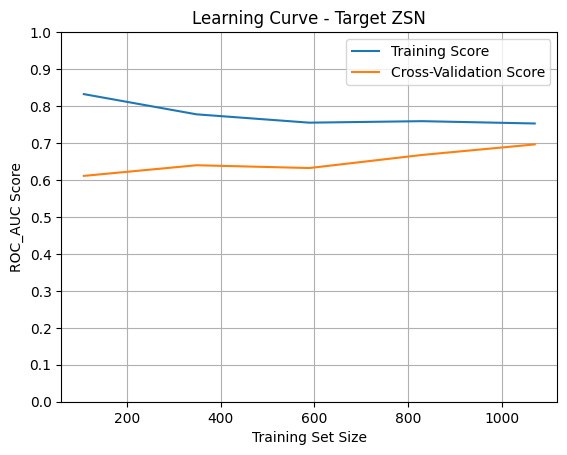

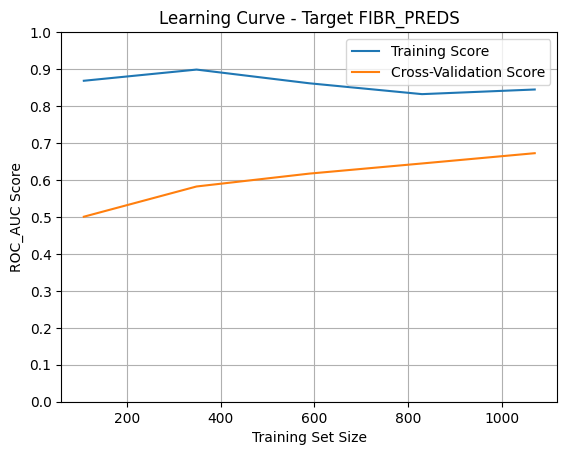

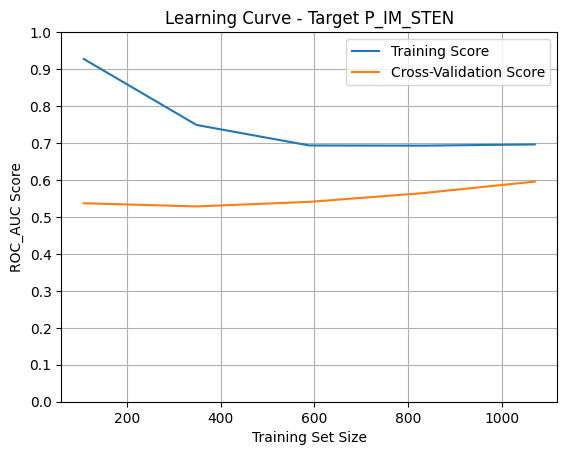

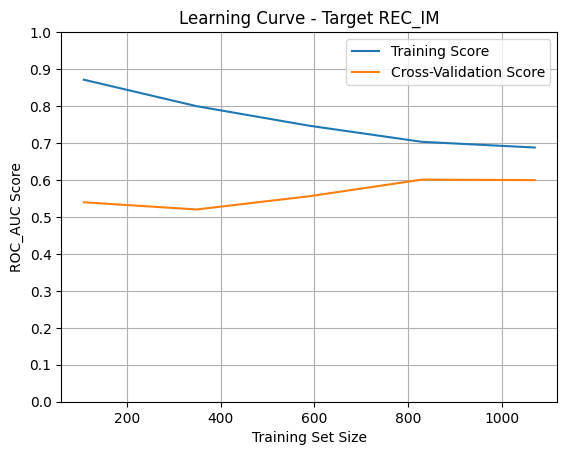

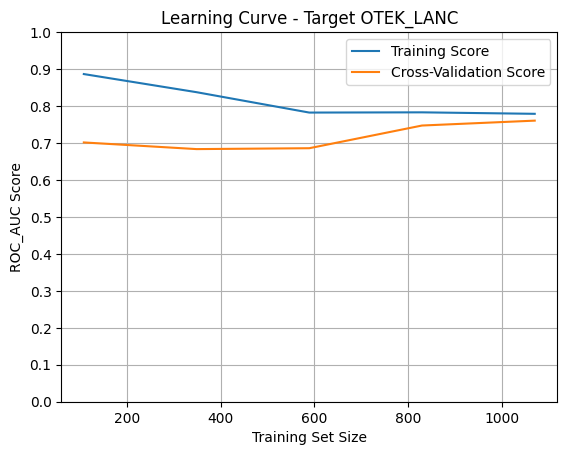

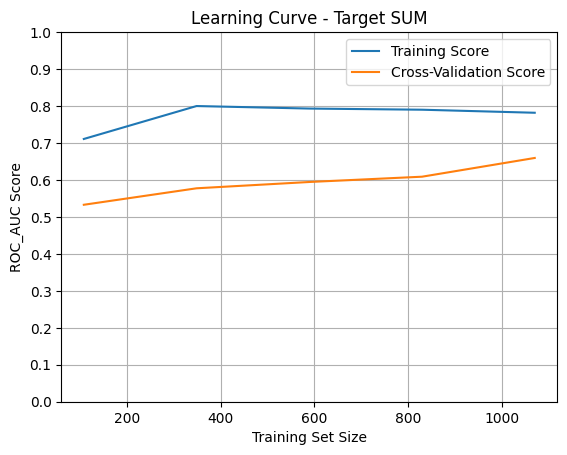

In [72]:
learning_curve_graph(best_model, X_train, y_train)

In [73]:
y = y[:-1]
print(len(y))

5


### SMOTE

#### Grid search

In [74]:
%%script false --no-raise-error # Remove if you want to run grid search
# Define the pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=0)),
    ('model', DecisionTreeClassifier(random_state=0))
])

best_alphas = []
# Post pruning
for i in range(len(y)):
  path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train[i], y_train[i])
  ccp_alphas, impurities = path.ccp_alphas, path.impurities
  best_alphas.append(ccp_alphas)

# Define the hyperparameters
param_grid = {
    'smote__sampling_strategy': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'model__max_depth': range(3, 15, 1),
    'model__min_samples_leaf': range(5, 20, 5),
}

# Define cross validation method
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define best models
best_model = []

for i in range(len(y)):
  param_grid["model__ccp_alpha"] = best_alphas[i]
  # Define the grid search
  grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
  grid_search.fit(X_train[i], y_train[i])
  best_model.append(grid_search.best_estimator_)

  print(f"==================== Hyperparameters for {y_names[i]} ====================")
  print(f"params: {grid_search.best_params_}", "\n")
  print(f"train score: {roc_auc_score(y_train[i], best_model[i].predict(X_train[i]))}", "\n")
  print(f"validation score: {grid_search.best_score_}", "\n")
  del param_grid["model__ccp_alpha"]
model_SMOTE_balanced = best_model
%store model_SMOTE_balanced

#### Test tables

In [75]:
# Train models
best_model = []
best_params = [{'model__max_depth': 6, 'model__min_samples_leaf': 20, 'model__min_samples_split': 55, 'smote__sampling_strategy': 0.6},
               {'model__max_depth': 7, 'model__min_samples_leaf': 15, 'model__min_samples_split': 55, 'smote__sampling_strategy': 0.6},
               {'model__max_depth': 4, 'model__min_samples_leaf': 25, 'model__min_samples_split': 10, 'smote__sampling_strategy': 1.0},
               {'model__max_depth': 8, 'model__min_samples_leaf': 15, 'model__min_samples_split': 40, 'smote__sampling_strategy': 0.8},
               {'model__max_depth': 7, 'model__min_samples_leaf': 20, 'model__min_samples_split': 55, 'smote__sampling_strategy': 0.8}]

for i in range(len(y)):
    pipeline = Pipeline(steps=[
        ('smote', SMOTE(random_state=0)),
        ('model', DecisionTreeClassifier(random_state=0))
    ])
    pipeline.set_params(**best_params[i])
    pipeline.fit(X_train[i], y_train[i])
    best_model.append(pipeline)

In [76]:
# Confusion matrix
test_SMOTE_balanced_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Tables
test_SMOTE_balanced = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}

for i in range(len(y)):
    y_pred = best_model[i].predict(X_test[i])

    # Test metrics table
    test_SMOTE_balanced[f"{y_names[i]}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
    ]

    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_SMOTE_balanced_conf[f"{y_names[i]}"] = [tn, fp, fn, tp]

# Test
test_SMOTE_balanced = pd.DataFrame(test_SMOTE_balanced)
test_SMOTE_balanced.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
test_SMOTE_balanced_conf = pd.DataFrame(test_SMOTE_balanced_conf)
test_SMOTE_balanced_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

#### Learning curve

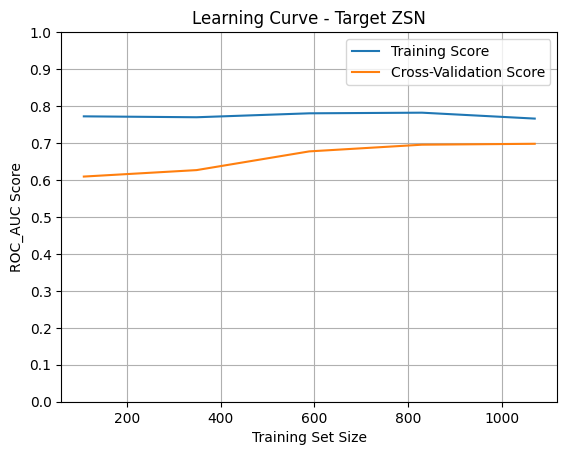

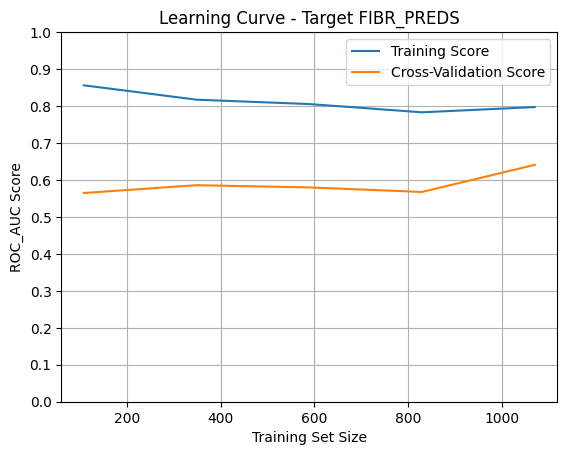

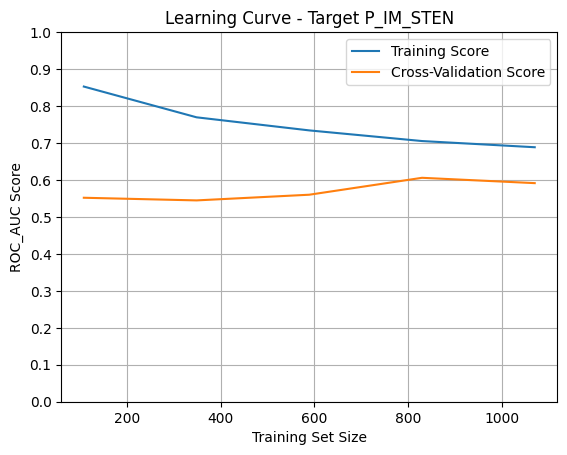

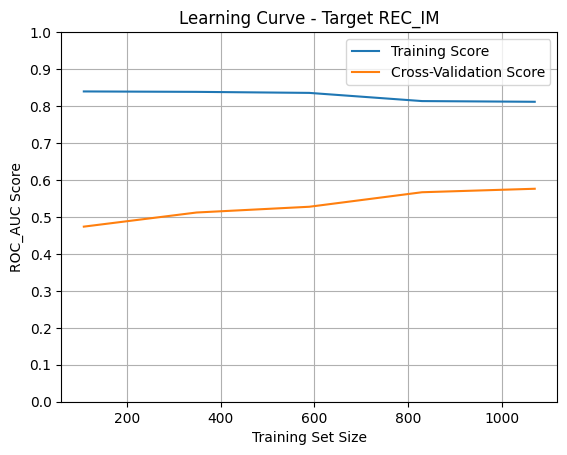

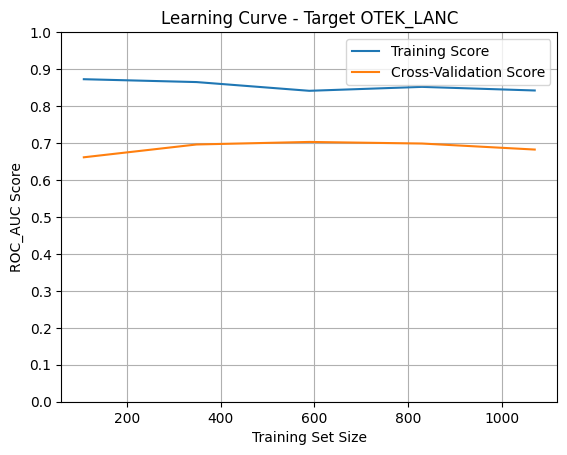

In [77]:
learning_curve_graph(best_model, X_train, y_train)

### Cost-sensitive Decision Tree

#### Grid search

In [78]:
%%script false --no-raise-error # Remove if you want to run grid search
# Define the pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=0))
])

# Define class weights
class_weights_zsn = {0: 1, 1: y[0].value_counts()[0] / y[0].value_counts()[1]}
class_weights_fibr_preds = {0: 1, 1: y[1].value_counts()[0] / y[1].value_counts()[1]}
class_weights_p_im_sten = {0: 1, 1: y[2].value_counts()[0] / y[2].value_counts()[1]}
class_weights_rec_im = {0: 1, 1: y[3].value_counts()[0] / y[3].value_counts()[1]}
class_weights_otek_lanc = {0: 1, 1: y[4].value_counts()[0] / y[4].value_counts()[1]}
weights = [class_weights_zsn, class_weights_fibr_preds, class_weights_p_im_sten, class_weights_rec_im, class_weights_otek_lanc]

# Post pruning
best_alphas = []
for i in range(len(y)):
    path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train[i], y_train[i])
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    best_alphas.append(ccp_alphas)

# Define the hyperparameters
param_grid = {
    'model__max_depth': range(3, 6, 1),
    'model__min_samples_leaf': range(10, 40, 5),
    'model__min_samples_split': range(10, 60, 5)
}

# Define cross validation method
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define best model
best_model = []
best_params = []

for i in range(len(y)):
    param_grid["model__class_weight"] = [weights[i]] # Adding weights to the current model
    # param_grid["model__ccp_alpha"] = best_alphas[i]
    # Define the grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')
    grid_search.fit(X_train[i], y_train[i])
    best_model.append(grid_search.best_estimator_)
    best_params.append(grid_search.best_params_)

    print(f"==================== Hyperparameters for {y_names[i]} ====================")
    print(f"params: {grid_search.best_params_}", "\n")
    print(f"train score: {roc_auc_score(y_train[i], best_model[i].predict(X_train[i]))}", "\n")
    print(f"validation score: {grid_search.best_score_}", "\n")

    # del param_grid["model__ccp_alpha"]
    del param_grid["model__class_weight"]
model_cost_sensitive = best_model
%store model_cost_sensitive

#### Test tables

In [79]:
# Train models
best_model = []
best_params = [{'model__max_depth': 4, 'model__min_samples_leaf': 20, 'model__min_samples_split': 50},
                {'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 25} ,
               {'model__max_depth': 3, 'model__min_samples_leaf': 35, 'model__min_samples_split': 10},
               {'model__max_depth': 5, 'model__min_samples_leaf': 30, 'model__min_samples_split': 10},
              {'model__max_depth': 3, 'model__min_samples_leaf': 35, 'model__min_samples_split': 10}]

class_weights_zsn = {0: 1, 1: y[0].value_counts()[0] / y[0].value_counts()[1]}
class_weights_fibr_preds = {0: 1, 1: y[1].value_counts()[0] / y[1].value_counts()[1]}
class_weights_p_im_sten = {0: 1, 1: y[2].value_counts()[0] / y[2].value_counts()[1]}
class_weights_rec_im = {0: 1, 1: y[3].value_counts()[0] / y[3].value_counts()[1]}
class_weights_otek_lanc = {0: 1, 1: y[4].value_counts()[0] / y[4].value_counts()[1]}
weights = [class_weights_zsn, class_weights_fibr_preds, class_weights_p_im_sten, class_weights_rec_im, class_weights_otek_lanc]

for i in range(len(y)):
    pipeline = Pipeline(steps=[
        ('model', DecisionTreeClassifier(random_state=0))
    ])
    pipeline.set_params(model__class_weight=weights[i])
    pipeline.set_params(**best_params[i])
    pipeline.fit(X_train[i], y_train[i])
    best_model.append(pipeline)

In [80]:
# Confusion matrix
test_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Tables
test_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}

for i in range(len(y)):
    y_pred = best_model[i].predict(X_test[i])

    # Test metrics table
    test_cost_sensitive[f"{y_names[i]}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred)
    ]

    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_cost_sensitive_conf[f"{y_names[i]}"] = [tn, fp, fn, tp]

# Test
test_cost_sensitive = pd.DataFrame(test_cost_sensitive)
test_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
test_cost_sensitive_conf = pd.DataFrame(test_cost_sensitive_conf)
test_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

In [81]:
test_cost_sensitive

,Metric,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC
0,Accuracy,0.715686,0.805882,0.484314,0.639216,0.807843
1,Precision,0.398496,0.220930,0.121107,0.130435,0.234043
2,Recall,0.449153,0.372549,0.795455,0.500000,0.458333
3,F1 Score,0.422311,0.277372,0.210210,0.206897,0.309859
4,ROC AUC,0.622535,0.613290,0.625195,0.576840,0.651245


#### Learning curve

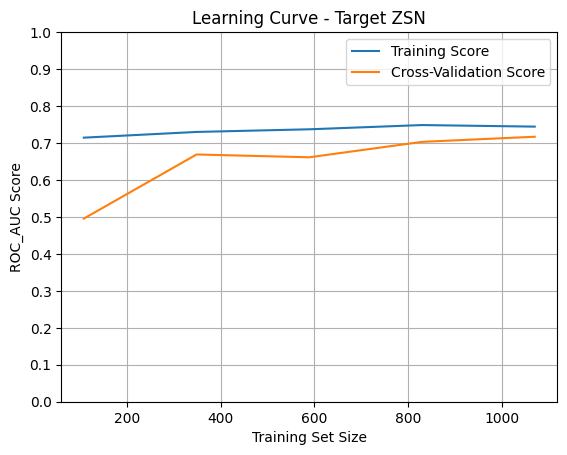

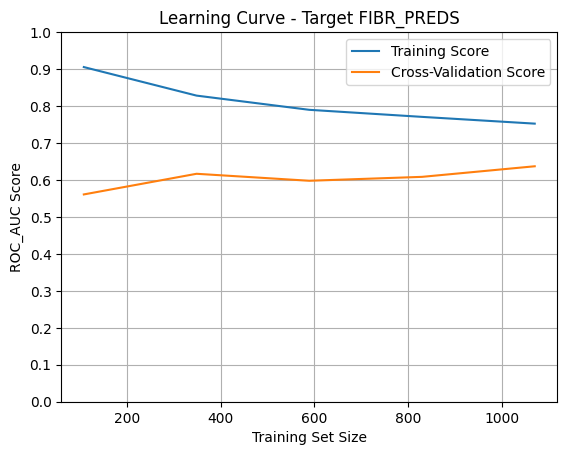

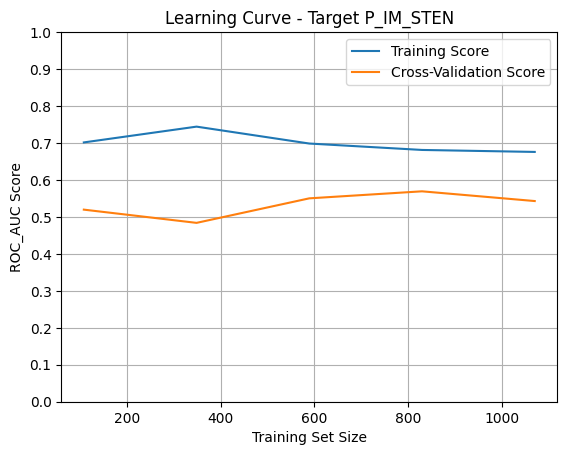

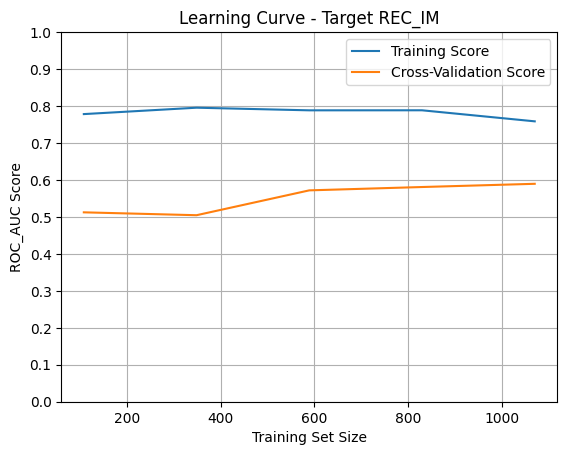

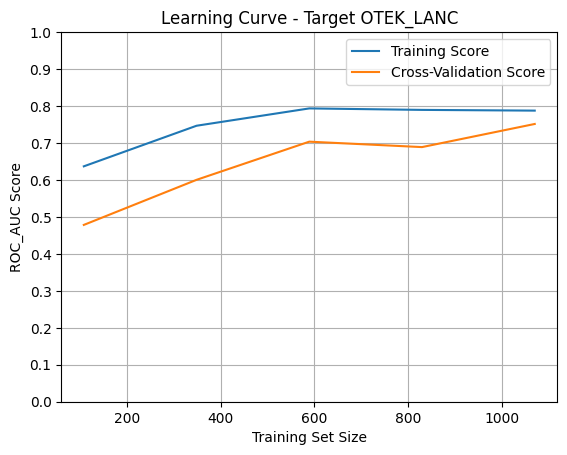

In [82]:
learning_curve_graph(best_model, X_train, y_train)

### Cost-sensitive + SMOTE

#### Grid search

In [83]:
%%script false --no-raise-error # Remove if you want to run grid search
# Define the pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=0)),
    ('model', DecisionTreeClassifier(random_state=0))
])



# Define the hyperparameters
param_grid = {
    'smote__sampling_strategy': [0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0],
    'model__max_depth': range(3, 10, 1),
    'model__min_samples_split': range(10, 60, 5),
    'model__min_samples_leaf': range(10, 40, 5),
    'model__class_weight': [{0: 1, 1: 3}, {0: 1, 1: 3.5}, {0: 1, 1: 9}, {0: 1, 1: 9.5}, {0: 1, 1: 10}, {0: 1, 1: 10.5}, {0: 1, 1: 11}],
}

# Define cross validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc')

# Define best model
best_model = []
best_params = []

for i in range(len(y)):
    grid_search.fit(X_train[i], y_train[i])
    best_model.append(grid_search.best_estimator_)
    best_params.append(grid_search.best_params_)

    print(f"==================== Hyperparameters for {y_names[i]} ====================")
    print(f"params: {grid_search.best_params_}", "\n")
    print(f"train score: {roc_auc_score(y_train[i], best_model[i].predict(X_train[i]))}", "\n")
    print(f"validation score: {grid_search.best_score_}", "\n")

model_SMOTE_cost_sensitive = best_model
%store model_SMOTE_cost_sensitive

#### Test tables

In [84]:
# Train models
best_model = []
best_params = [{'model__class_weight': {0: 1, 1: 4}, 'model__max_depth': 4, 'model__min_samples_leaf': 25, 'model__min_samples_split': 55, 'smote__sampling_strategy': 0.8},
               {'model__class_weight': {0: 1, 1: 3}, 'model__max_depth': 9, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 30, 'smote__sampling_strategy': 0.6},
               {'model__class_weight': {0: 1, 1: 3}, 'model__max_depth': 9, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 15, 'model__min_samples_split': 5, 'smote__sampling_strategy': 0.6},
               {'model__class_weight': {0: 1, 1: 2}, 'model__max_depth': 9, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 25, 'smote__sampling_strategy': 0.5},
               {'model__class_weight': {0: 1, 1: 3}, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'smote__sampling_strategy': 0.6}]

for i in range(len(y)):
    pipeline = Pipeline(steps=[
        ('smote', SMOTE(random_state=0)),
        ('model', DecisionTreeClassifier(random_state=0))
    ])
    pipeline.set_params(**best_params[i])
    pipeline.fit(X_train[i], y_train[i])
    best_model.append(pipeline)

In [85]:
# Confusion matrix
test_SMOTE_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Tables
test_SMOTE_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}

for i in range(len(y)):
    y_pred = best_model[i].predict(X_test[i])

    # Test metrics table
    test_SMOTE_cost_sensitive[f"{y_names[i]}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
    ]

    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_SMOTE_cost_sensitive_conf[f"{y_names[i]}"] = [tn, fp, fn, tp]

# Test
test_SMOTE_cost_sensitive = pd.DataFrame(test_SMOTE_cost_sensitive)
test_SMOTE_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
test_SMOTE_cost_sensitive_conf = pd.DataFrame(test_SMOTE_cost_sensitive_conf)
test_SMOTE_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

In [86]:
test_SMOTE_cost_sensitive

,Metric,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC
0,Accuracy,0.462745,0.660784,0.656863,0.650980,0.578431
1,Precision,0.279661,0.128049,0.125714,0.134831,0.115207
2,Recall,0.838983,0.411765,0.500000,0.500000,0.520833
3,F1 Score,0.419492,0.195349,0.200913,0.212389,0.188679
4,ROC AUC,0.594236,0.550109,0.585837,0.583333,0.552624


#### Learning curve

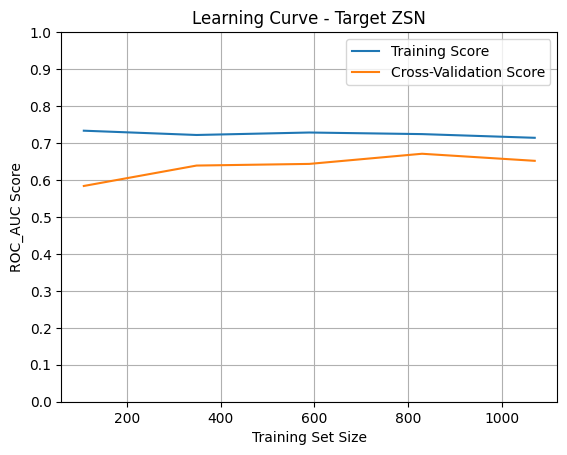

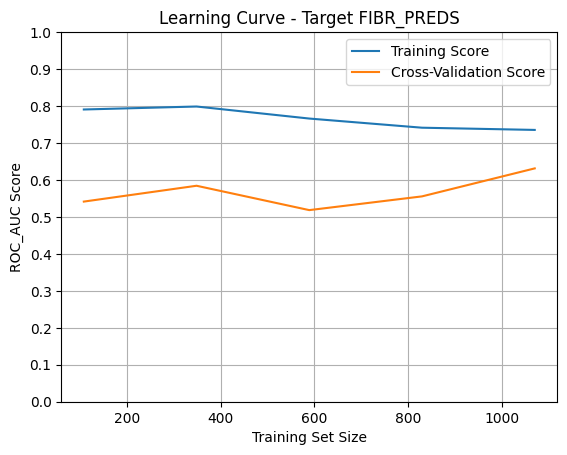

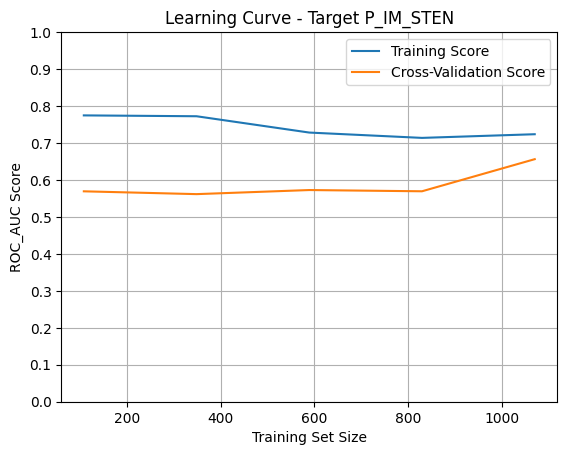

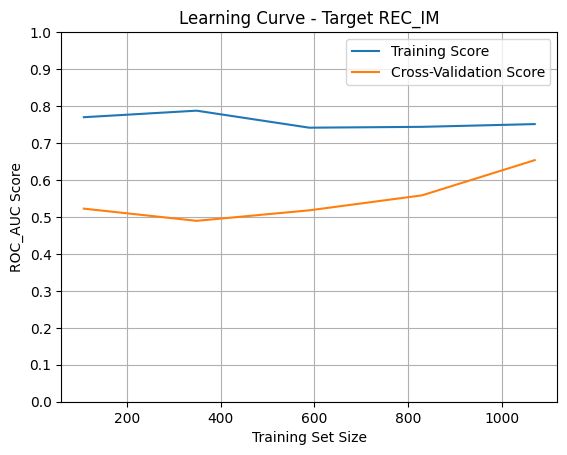

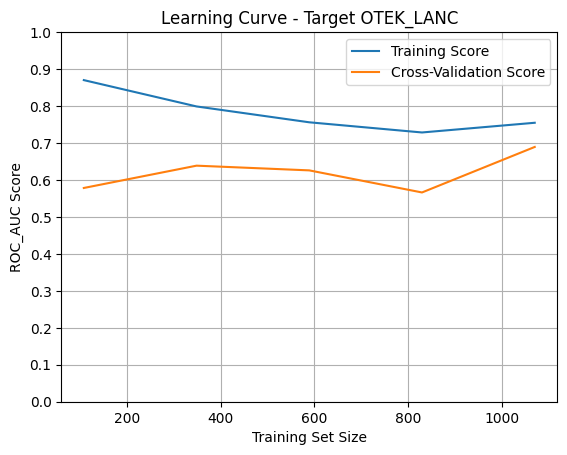

In [87]:
learning_curve_graph(best_model, X_train, y_train)

### Random Forest

#### Grid search

In [88]:
%%script false --no-raise-error # Remove if you want to run grid search
# Define the pipeline
pipeline = Pipeline(steps=[
    # ('smote', SMOTE(random_state=0)),
    ('model', RandomForestClassifier(random_state=0))
])

# Define class weights
class_weights_zsn = {0: 1, 1: y[0].value_counts()[0] / y[0].value_counts()[1]}
class_weights_fibr_preds = {0: 1, 1: y[1].value_counts()[0] / y[1].value_counts()[1]}
class_weights_p_im_sten = {0: 1, 1: y[2].value_counts()[0] / y[2].value_counts()[1]}
class_weights_rec_im = {0: 1, 1: y[3].value_counts()[0] / y[3].value_counts()[1]}
class_weights_otek_lanc = {0: 1, 1: y[4].value_counts()[0] / y[4].value_counts()[1]}
weights = [class_weights_zsn, class_weights_fibr_preds, class_weights_p_im_sten, class_weights_rec_im, class_weights_otek_lanc]

# Define the hyperparameters
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': range(3, 10, 1),
    'model__min_samples_leaf': range(10, 40, 5),
}

# Define cross validation method
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define best model
best_model = []
best_params = []

for i in [2]:
    param_grid["model__class_weight"] = [weights[i]]
    # Define the grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', verbose=2)
    grid_search.fit(X_train[i], y_train[i])
    best_model.append(grid_search.best_estimator_)
    best_params.append(grid_search.best_params_)

    print(f"==================== Hyperparameters for {y_names[i]} ====================")
    print(f"params: {grid_search.best_params_}", "\n")
    print(f"train score: {roc_auc_score(y_train[i], best_model[i].predict(X_train[i]))}", "\n")
    print(f"validation score: {grid_search.best_score_}", "\n")

    del param_grid["model__class_weight"]
model_RF = best_model
%store model_RF

#### Test tables

In [89]:
# Train table example for 5 targets
best_model = []
best_params = [{'model__class_weight': {0: 1, 1: 3.314720812182741}, 'model__max_depth': 4, 'model__n_estimators': 150},
               {'model__class_weight': {0: 1, 1: 9.0}, 'model__max_depth': 3, 'model__n_estimators': 50},
               {'model__class_weight': {0: 1, 1: 10.486486486486486}, 'model__max_depth': 5, 'model__min_samples_leaf': 15, 'model__n_estimators': 100},
               {'model__class_weight': {0: 1, 1: 9.69182389937107}, 'model__min_samples_leaf': 10, 'model__min_samples_split': 40, 'model__n_estimators': 50},
               {'model__class_weight': {0: 1, 1: 9.69182389937107}, 'model__max_depth': 4, 'model__n_estimators': 150}]

for i in range(len(y)):
    pipeline = Pipeline(steps=[
        # ('smote', SMOTE(random_state=0)),
        ('model', RandomForestClassifier(random_state=0))
    ])
    pipeline.set_params(**best_params[i])
    pipeline.fit(X_train[i], y_train[i])
    best_model.append(pipeline)

In [90]:
# Confusion matrix
test_RF_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Tables
test_RF = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}

for i in range(len(y)):
    y_pred = best_model[i].predict(X_test[i])
    # Test metrics table
    test_RF[f"{y_names[i]}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
    ]
    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_RF_conf[f"{y_names[i]}"] = [tn, fp, fn, tp]

# Test
test_RF = pd.DataFrame(test_RF)
test_RF.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
test_RF_conf = pd.DataFrame(test_RF_conf)
test_RF_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

#### Learning curve

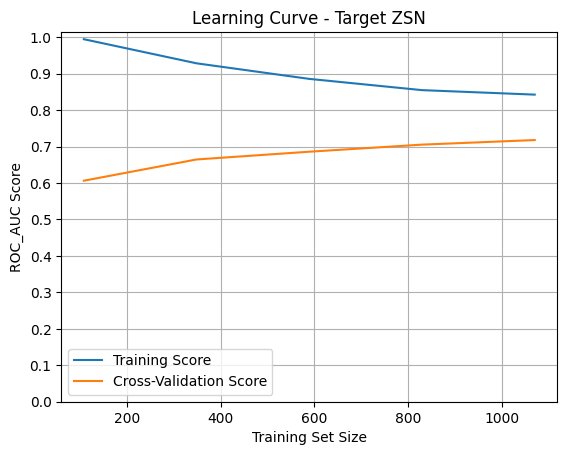

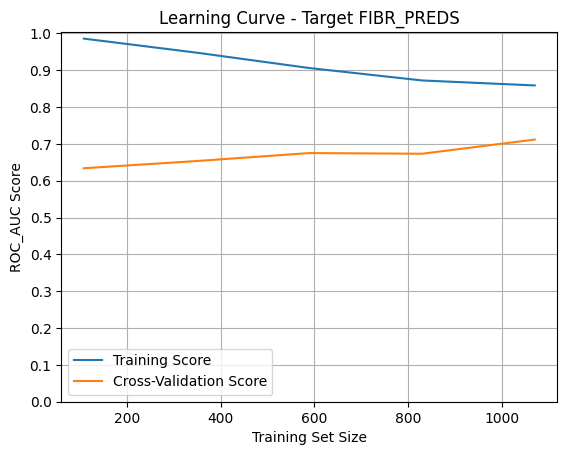

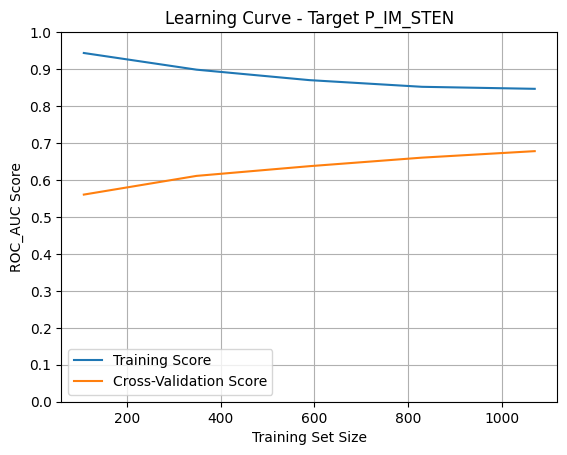

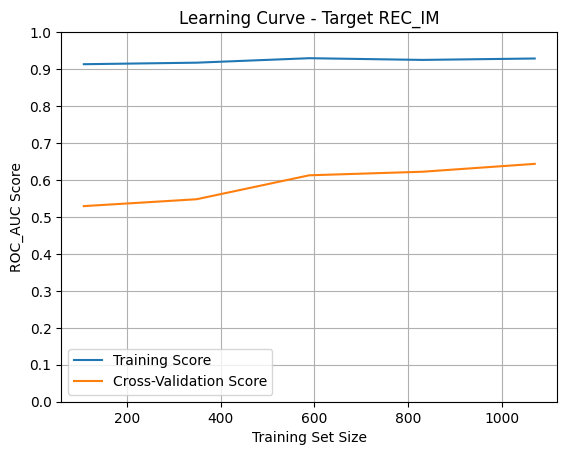

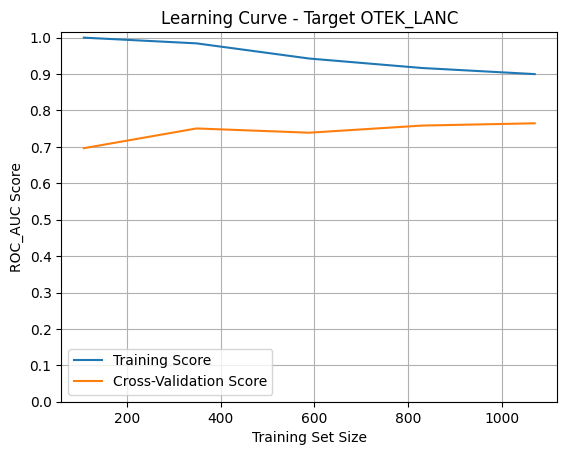

In [91]:
learning_curve_graph(best_model, X_train, y_train)

## 6. Model Evaluation

### ZSN

In [92]:
# Decision Tree: SMOTE
test_zsn = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                "Decision Tree: Traditional": test["ZSN"],
               "Decision Tree: SMOTE": test_SMOTE_balanced["ZSN"],
               "Decision Tree: Cost-sensitive": test_cost_sensitive["ZSN"],
               "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["ZSN"],
                "Random Forest: SMOTE": test_RF["ZSN"]}
test_zsn = pd.DataFrame(test_zsn)
test_zsn.columns = ["Metric", "Decision Tree: Traditional", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive", "Random Forest: SMOTE"]

test_zsn

,Metric,Decision Tree: Traditional,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive,Random Forest: SMOTE
0,Accuracy,0.800000,0.790196,0.715686,0.462745,0.727451
1,Precision,0.642857,0.573333,0.398496,0.279661,0.423358
2,Recall,0.305085,0.364407,0.449153,0.838983,0.491525
3,F1 Score,0.413793,0.445596,0.422311,0.419492,0.454902
4,ROC AUC,0.627032,0.641387,0.622535,0.594236,0.644997


In [99]:
test_conf[["Metric", "ZSN"]]

,Metric,ZSN
0,TN,372
1,FP,20
2,FN,82
3,TP,36


In [94]:
# Confusion matrix
test_SMOTE_balanced_conf[["Metric", "ZSN"]]

,Metric,ZSN
0,TN,360
1,FP,32
2,FN,75
3,TP,43


In [95]:
test_cost_sensitive_conf[["Metric", "ZSN"]]

,Metric,ZSN
0,TN,312
1,FP,80
2,FN,65
3,TP,53


In [96]:
test_SMOTE_cost_sensitive_conf[["Metric", "ZSN"]]

,Metric,ZSN
0,TN,137
1,FP,255
2,FN,19
3,TP,99


In [97]:
test_RF_conf[["Metric", "ZSN"]]

,Metric,ZSN
0,TN,313
1,FP,79
2,FN,60
3,TP,58


### FIBR_PREDS

In [101]:
test_fibr_preds = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                   "Decision Tree: Traditional": test["FIBR_PREDS"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["FIBR_PREDS"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["FIBR_PREDS"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["FIBR_PREDS"],
                    "Random Forest: SMOTE": test_RF["FIBR_PREDS"]}
test_fibr_preds = pd.DataFrame(test_fibr_preds)
test_fibr_preds.columns = ["Metric", "Decision Tree: Traditional", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive", "Random Forest: SMOTE"]

test_fibr_preds

,Metric,Decision Tree: Traditional,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive,Random Forest: SMOTE
0,Accuracy,0.896078,0.860784,0.805882,0.660784,0.815686
1,Precision,0.437500,0.282609,0.220930,0.128049,0.247059
2,Recall,0.137255,0.254902,0.372549,0.411765,0.411765
3,F1 Score,0.208955,0.268041,0.277372,0.195349,0.308824
4,ROC AUC,0.558824,0.591503,0.613290,0.550109,0.636166


In [102]:
test[["Metric", "FIBR_PREDS"]]

,Metric,FIBR_PREDS
0,Accuracy,0.896078
1,Precision,0.437500
2,Recall,0.137255
3,F1 Score,0.208955
4,ROC AUC,0.558824


In [103]:
# Confusion matrix
test_SMOTE_balanced_conf[["Metric", "FIBR_PREDS"]]

,Metric,FIBR_PREDS
0,TN,426
1,FP,33
2,FN,38
3,TP,13


In [104]:
test_cost_sensitive_conf[["Metric", "FIBR_PREDS"]]

,Metric,FIBR_PREDS
0,TN,392
1,FP,67
2,FN,32
3,TP,19


In [105]:
test_SMOTE_cost_sensitive_conf[["Metric", "FIBR_PREDS"]]

,Metric,FIBR_PREDS
0,TN,316
1,FP,143
2,FN,30
3,TP,21


In [106]:
test_RF_conf[["Metric", "FIBR_PREDS"]]

,Metric,FIBR_PREDS
0,TN,395
1,FP,64
2,FN,30
3,TP,21


### P_IM_STEN

In [107]:
test_p_im_sten = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                    "Decision Tree: Traditional": test["P_IM_STEN"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["P_IM_STEN"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["P_IM_STEN"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["P_IM_STEN"],
                    "Random Forest: SMOTE": test_RF["P_IM_STEN"]}
test_p_im_sten = pd.DataFrame(test_p_im_sten)
test_p_im_sten.columns = ["Metric", "Decision Tree: Traditional", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive", "Random Forest: SMOTE"]

test_p_im_sten

,Metric,Decision Tree: Traditional,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive,Random Forest: SMOTE
0,Accuracy,0.913725,0.670588,0.484314,0.656863,0.758824
1,Precision,0.000000,0.143678,0.121107,0.125714,0.156522
2,Recall,0.000000,0.568182,0.795455,0.500000,0.409091
3,F1 Score,0.000000,0.229358,0.210210,0.200913,0.226415
4,ROC AUC,0.500000,0.624220,0.625195,0.585837,0.600468


In [120]:
test_conf[["Metric", "P_IM_STEN"]]

,Metric,P_IM_STEN
0,TN,466
1,FP,0
2,FN,44
3,TP,0


In [109]:
# Confusion matrix
test_SMOTE_balanced_conf[["Metric", "P_IM_STEN"]]

,Metric,P_IM_STEN
0,TN,317
1,FP,149
2,FN,19
3,TP,25


In [110]:
test_cost_sensitive_conf[["Metric", "P_IM_STEN"]]

,Metric,P_IM_STEN
0,TN,212
1,FP,254
2,FN,9
3,TP,35


In [111]:
test_SMOTE_cost_sensitive_conf[["Metric", "P_IM_STEN"]]

,Metric,P_IM_STEN
0,TN,313
1,FP,153
2,FN,22
3,TP,22


In [112]:
test_RF_conf[["Metric", "P_IM_STEN"]]

,Metric,P_IM_STEN
0,TN,369
1,FP,97
2,FN,26
3,TP,18


### REC_IM

In [113]:
test_rec_im = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                    "Decision Tree: Traditional": test["REC_IM"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["REC_IM"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["REC_IM"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["REC_IM"],
                    "Random Forest: SMOTE": test_RF["REC_IM"]}
test_rec_im = pd.DataFrame(test_rec_im)
test_rec_im.columns = ["Metric", "Decision Tree: Traditional", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive", "Random Forest: SMOTE"]

test_rec_im

,Metric,Decision Tree: Traditional,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive,Random Forest: SMOTE
0,Accuracy,0.905882,0.813725,0.639216,0.650980,0.868627
1,Precision,0.000000,0.149254,0.130435,0.134831,0.327273
2,Recall,0.000000,0.208333,0.500000,0.500000,0.375000
3,F1 Score,0.000000,0.173913,0.206897,0.212389,0.349515
4,ROC AUC,0.500000,0.542478,0.576840,0.583333,0.647457


In [119]:
test_conf[["Metric", "REC_IM"]]

,Metric,REC_IM
0,TN,462
1,FP,0
2,FN,48
3,TP,0


In [115]:
# Confusion matrix
test_SMOTE_balanced_conf[["Metric", "REC_IM"]]

,Metric,REC_IM
0,TN,405
1,FP,57
2,FN,38
3,TP,10


In [116]:
test_cost_sensitive_conf[["Metric", "REC_IM"]]

,Metric,REC_IM
0,TN,302
1,FP,160
2,FN,24
3,TP,24


In [117]:
test_SMOTE_cost_sensitive_conf[["Metric", "REC_IM"]]

,Metric,REC_IM
0,TN,308
1,FP,154
2,FN,24
3,TP,24


In [118]:
test_RF_conf[["Metric", "REC_IM"]]

,Metric,REC_IM
0,TN,425
1,FP,37
2,FN,30
3,TP,18


### OTEK_LANC

In [121]:
test_otek_lanc = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                    "Decision Tree: Traditional": test["OTEK_LANC"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["OTEK_LANC"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["OTEK_LANC"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["OTEK_LANC"],
                    "Random Forest: SMOTE": test_RF["OTEK_LANC"]}
test_otek_lanc = pd.DataFrame(test_otek_lanc)
test_otek_lanc.columns = ["Metric", "Decision Tree: Traditional", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive", "Random Forest: SMOTE"]

test_otek_lanc

,Metric,Decision Tree: Traditional,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive,Random Forest: SMOTE
0,Accuracy,0.901961,0.841176,0.807843,0.578431,0.856863
1,Precision,0.450000,0.238095,0.234043,0.115207,0.318841
2,Recall,0.187500,0.312500,0.458333,0.520833,0.458333
3,F1 Score,0.264706,0.270270,0.309859,0.188679,0.376068
4,ROC AUC,0.581845,0.604302,0.651245,0.552624,0.678301


In [127]:
test_conf[["Metric", "OTEK_LANC"]]

,Metric,OTEK_LANC
0,TN,451
1,FP,11
2,FN,39
3,TP,9


In [123]:
# Confusion matrix
test_SMOTE_balanced_conf[["Metric", "OTEK_LANC"]]

,Metric,OTEK_LANC
0,TN,414
1,FP,48
2,FN,33
3,TP,15


In [124]:
test_cost_sensitive_conf[["Metric", "OTEK_LANC"]]

,Metric,OTEK_LANC
0,TN,390
1,FP,72
2,FN,26
3,TP,22


In [125]:
test_SMOTE_cost_sensitive_conf[["Metric", "OTEK_LANC"]]

,Metric,OTEK_LANC
0,TN,270
1,FP,192
2,FN,23
3,TP,25


In [126]:
test_RF_conf[["Metric", "OTEK_LANC"]]

,Metric,OTEK_LANC
0,TN,415
1,FP,47
2,FN,26
3,TP,22


### SUM

In [128]:
test_sum = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
                    "Decision Tree: SMOTE": test["SUM"]}
test_sum = pd.DataFrame(test_sum)
test_sum.columns = ["Metric", "Decision Tree: Traditional"]

test_sum

,Metric,Decision Tree: Traditional
0,Accuracy,0.613725
1,Precision,0.665339
2,Recall,0.596429
3,F1 Score,0.629002
4,ROC AUC,0.615606


In [130]:
# Confusion matrix
test_conf[["Metric", "SUM"]]

,Metric,SUM
0,TN,146
1,FP,84
2,FN,113
3,TP,167
